<a href="https://colab.research.google.com/github/saivishwanathgoud/MachineLearning/blob/master/Car_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Car Price Prediction**

*Description of dataset:* 


1. Name : Company name
2. Location : Location where the car has been purchase
3. Year : Manufacturing year
4. Kilometers_driven : Total distance the car has been driven
5. Fuel Type ; Diesel, Petrol, CNG, Electric, LPG (Type of Fuel used)
6. Transmission : Type of gearing system used
7. Owner type : First/Second/Third
8. Mileage : a number of miles travelled or covered in a litre or kg of fuel in kmpl or km/kg
9. Engine : A component that drives the system in CC
10. Power : Power of Engine
11. Seats : Seats provided
12. Price : Price of vehichle (In Lakhs) #### Target

In [1]:
#Importing neccassary libraries
import pandas as pd
import numpy as np

#data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

#Model Building libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import ExtraTreesRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("train-data.txt")
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
df.shape

(6019, 14)

**Data Preprocessing**

In [4]:
#Removing unnecesary strings values in columns 
df['Power'] = df['Power'].str.replace('bhp', '')
df['Engine'] = df['Engine'].str.replace('CC','')
df['Mileage'] = df['Mileage'].str.replace('kmpl', '')
df['Mileage'] = df['Mileage'].str.replace('km/kg', '')

In [5]:
#checking for datatypes 
df.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [6]:
#converting datatypes for numerical columns 
df['Mileage'] = pd.to_numeric(df['Mileage'].astype(str).str[:-1], errors='coerce')
df['Engine'] = pd.to_numeric(df['Engine'].astype(str).str[:-1], errors='coerce')
df['Power'] = pd.to_numeric(df['Power'].astype(str).str[:-1], errors='coerce')

In [7]:
#checking for null values 
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [8]:
#dropping the columns 
df.drop(columns = ['Unnamed: 0', 'New_Price'], inplace = True) 

In [9]:
#filling the missing values with median as its more robust to outliers 
df[['Mileage','Engine', 'Power', 'Seats']] = df[['Mileage','Engine', 'Power', 'Seats']].apply(lambda x: x.fillna(x.median()),axis=0)

In [10]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


In [12]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [13]:
#from pandas_profiling import ProfileReport
#report = ProfileReport(df, explorative= True)
#report

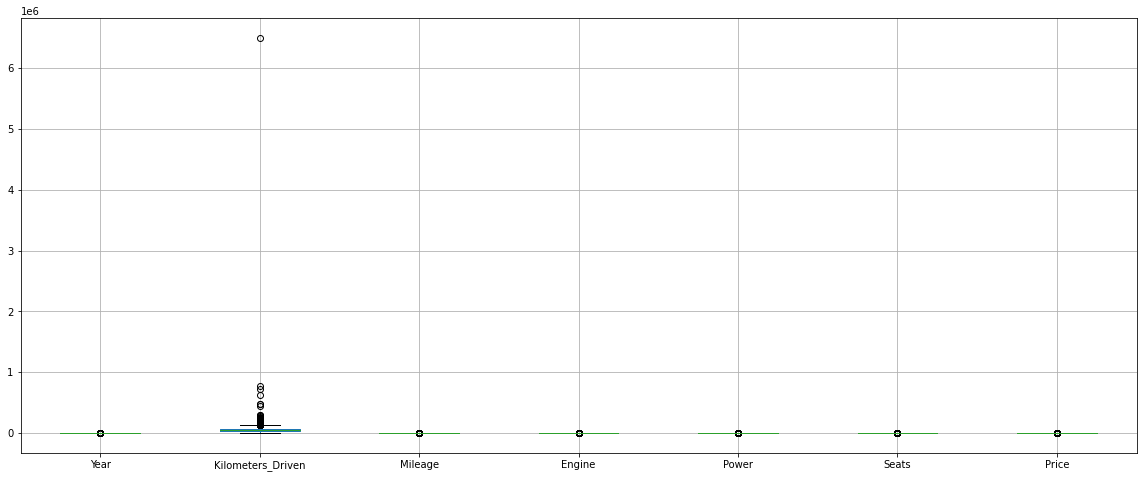

In [14]:
df.boxplot(figsize=(20,8))

In [15]:
#Using Log transform for Outlier treatment

df["Kilometers_Driven"] = df["Kilometers_Driven"].map(lambda i: np.log(i) if i > 0 else 0)
print(df['Kilometers_Driven'].skew())

-1.29076524053299


In [16]:
df['Year']

0       2010
1       2015
2       2011
3       2012
4       2013
        ... 
6014    2014
6015    2015
6016    2012
6017    2013
6018    2011
Name: Year, Length: 6019, dtype: int64

In [17]:
#Using Median value for outlier treatment
print(df['Year'].quantile(0.50)) 
print(df['Year'].quantile(0.95))

2014.0
2018.0


In [18]:
df['Year'] = np.where(df['Year'] > 2018.0, 2014.0, df['Year'])

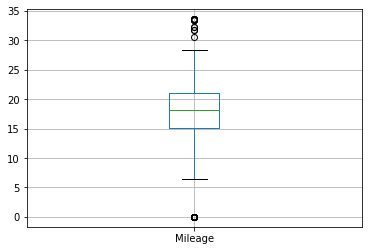

In [19]:
df.boxplot(column=['Mileage'])

In [20]:
#Using Quantile for outlier treatment
print(df['Mileage'].quantile(0.10))
print(df['Mileage'].quantile(0.90))

12.8
24.0


In [21]:
df["Mileage"] = np.where(df["Mileage"] <df['Mileage'].quantile(0.10), df['Mileage'].quantile(0.10),df['Mileage'])
df["Mileage"] = np.where(df["Mileage"] >df['Mileage'].quantile(0.90), df['Mileage'].quantile(0.90),df['Mileage'])

Using the same method for treating other outliers too

In [22]:
print(df['Engine'].quantile(0.10))
print(df['Engine'].quantile(0.90))

1061.0
2494.0


In [23]:
df["Engine"] = np.where(df["Engine"] <1061.0, 1061.0,df['Engine'])
df["Engine"] = np.where(df["Engine"] >2494.0, 2494.0,df['Engine'])

In [24]:
print(df['Power'].quantile(0.10))
print(df['Power'].quantile(0.90))

67.04
184.0


In [25]:
df["Power"] = np.where(df["Power"] <67.04, 67.04,df['Power'])
df["Power"] = np.where(df["Power"] >184.0, 184.0,df['Power'])

In [26]:
df["Seats"] = np.where(df["Seats"] <df['Seats'].quantile(0.10), df['Seats'].quantile(0.10),df['Seats'])
df["Seats"] = np.where(df["Seats"] >df['Seats'].quantile(0.90), df['Seats'].quantile(0.90),df['Seats'])

In [27]:
df["Price"] = np.where(df["Price"] <df['Price'].quantile(0.10), df['Price'].quantile(0.10),df['Price'])
df["Price"] = np.where(df["Price"] >df['Price'].quantile(0.90), df['Price'].quantile(0.90),df['Price'])

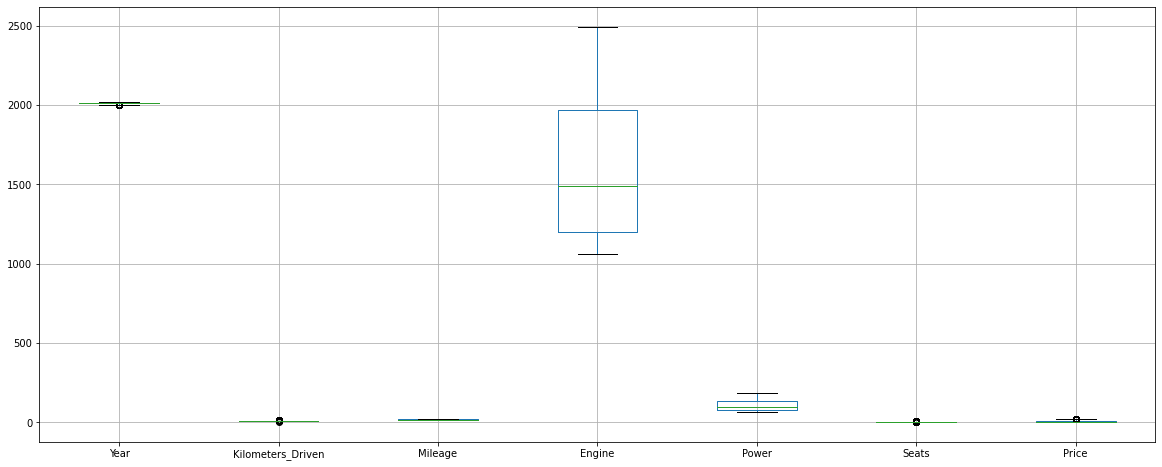

In [28]:
#dataset after treating outliers. 
df.boxplot(figsize=(20,8))

**Data Visualization**

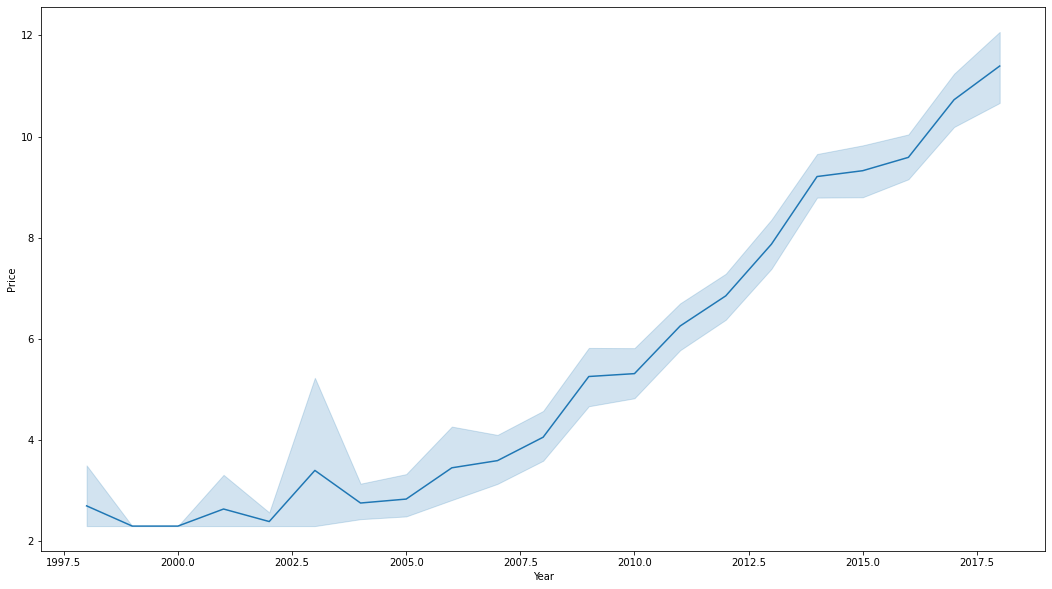

In [29]:
#does year effect the price
plt.figure(figsize=(18,10))
sns.lineplot(x="Year", y="Price", data=df)
plt.show()

Price and year are directly proportional to each other. As 90's cars had few features and less models compared to 20's cars with several new features and model options. 

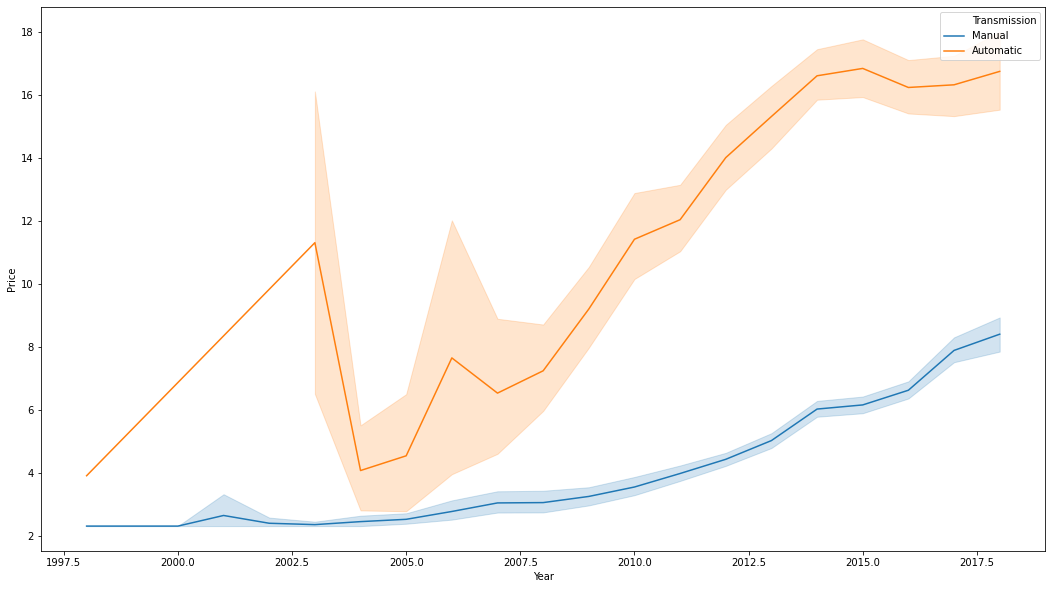

In [30]:
#does transmission effect price
plt.figure(figsize=(18,10))
sns.lineplot(x="Year", y="Price", hue='Transmission', data=df)
plt.show()

Manual transmission cost less than Automatic cars due to less complicated transmission system. Cost of Automatic Cars will always be high compared to Manual and they require less effort to drive in City traffic (People prefer to buy this more)

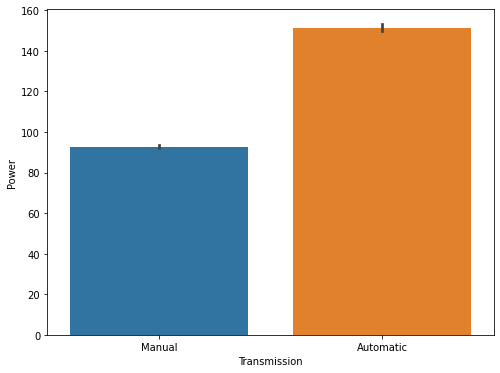

In [31]:
#why automatic transmissions costs more than manual
plt.figure(figsize=(8,6))
sns.barplot(x="Transmission", y="Power", data=df)
plt.show()

Automatic transmission car engine tend to produce more as they can change gear ratio automatically i.e. no power loss due to mechanical parts like Clutches, Gear setup in Manual.

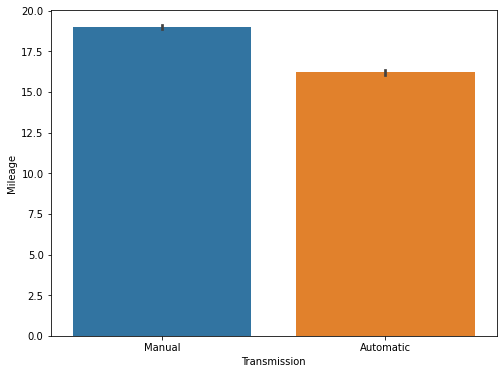

In [32]:
plt.figure(figsize=(8,6))
sns.barplot(x="Transmission", y="Mileage", data=df)
plt.show()

Manual cars always get better fuel economy than cars with automatic gearboxes. With a manual transmission because the motor is not having to work as hard to shift between gears and therefore the car doesn't consume as much gas.

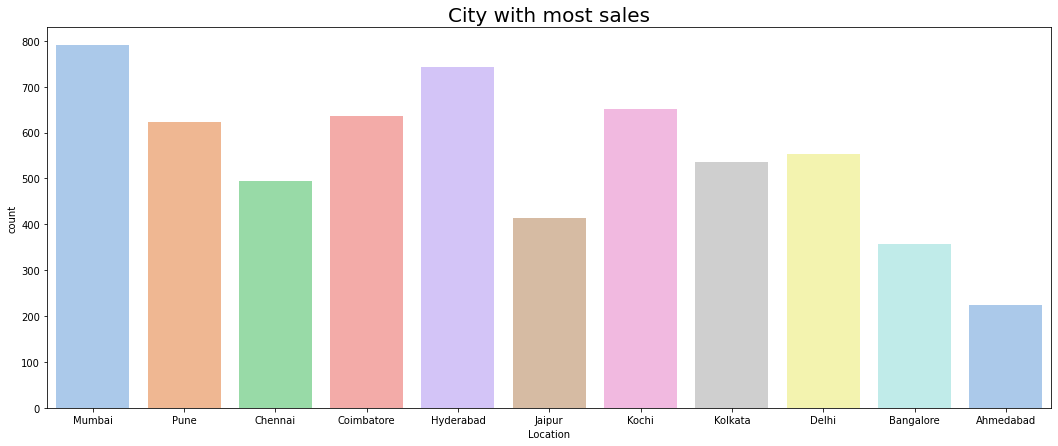

In [33]:
#which city has more #of sales 
plt.rcParams['figure.figsize'] = (18, 7)
sns.countplot(df['Location'], palette = 'pastel')
plt.title('City with most sales', fontsize = 20)
plt.show()

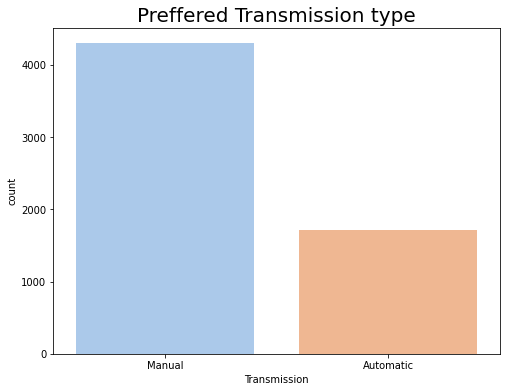

In [34]:
#Preferred Transmission type
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(df['Transmission'], palette = 'pastel')
plt.title('Preffered Transmission type', fontsize = 20)
plt.show()

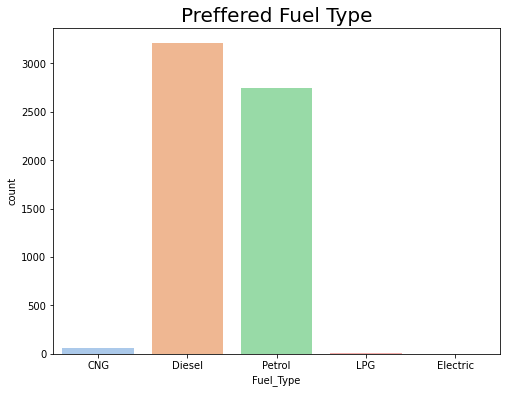

In [35]:
#preferred fuel type 
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(df['Fuel_Type'], palette = 'pastel')
plt.title('Preffered Fuel Type', fontsize = 20)
plt.show()

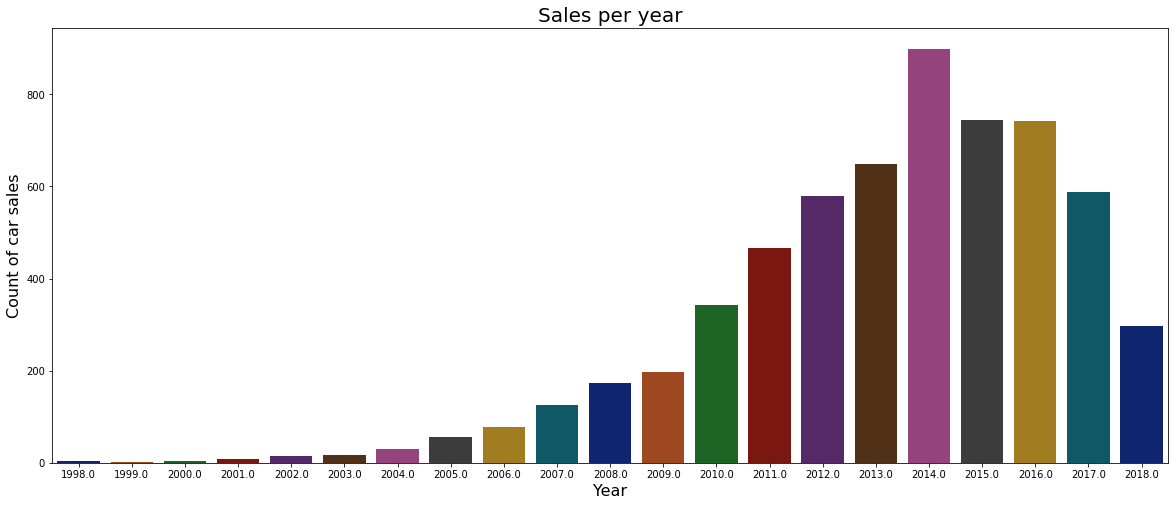

In [36]:
#which year has the max #of sales
plt.figure(figsize = (20, 8))
ax = sns.countplot(x = 'Year', data = df, palette = 'dark')
ax.set_title(label = 'Sales per year', fontsize = 20)
ax.set_xlabel(xlabel = 'Year', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of car sales', fontsize = 16)
plt.show()

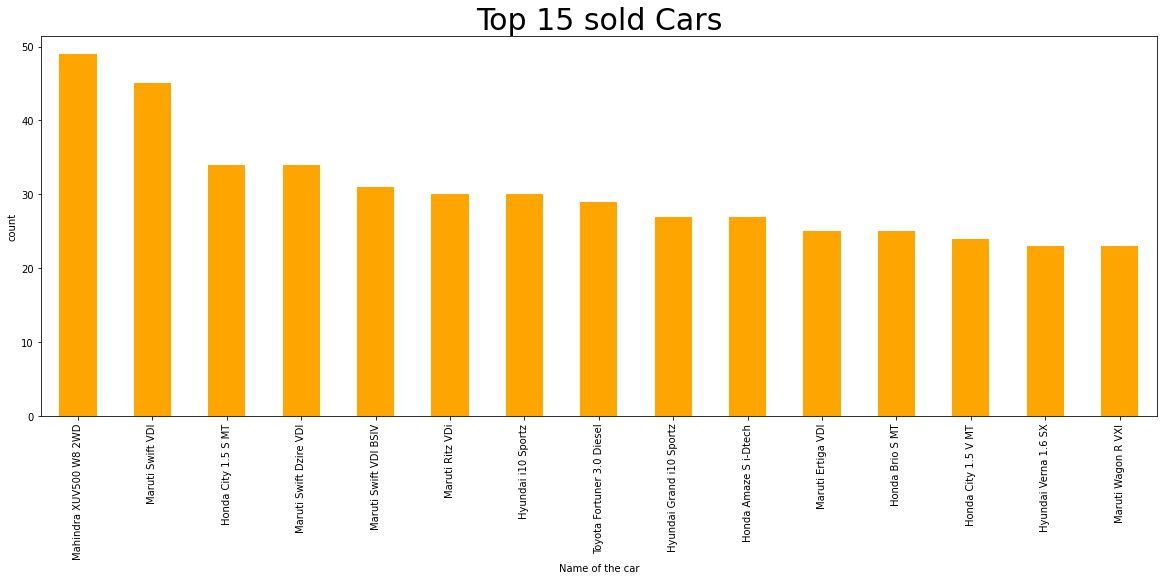

In [37]:
#top 15 cars

df['Name'].value_counts().head(15).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('Top 15 sold Cars', fontsize = 30, fontweight = 20)
plt.xlabel('Name of the car')
plt.ylabel('count')
plt.show()

Mahindra XUV had highest sales

### Treating Categorical columns

In [38]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010.0,11.184421,CNG,Manual,First,24.00,1061.0,67.04,5.0,2.30
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,10.621327,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011.0,10.736397,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012.0,11.373663,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,10.613246,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [39]:
#Columns with string values
categorical_column = ['Location', 'Fuel_Type',
                      'Transmission', 'Owner_Type']

In [40]:

#Deep copy the original data
df = df.copy(deep= True)
#Use Scikit-learn label encoding to encode character data
lab_enc = preprocessing.LabelEncoder()
for col in categorical_column:
        df[col] = lab_enc.fit_transform(df[col])
        le_name_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))
        print('Feature', col)
        print('mapping', le_name_mapping)

Feature Location
mapping {'Ahmedabad': 0, 'Bangalore': 1, 'Chennai': 2, 'Coimbatore': 3, 'Delhi': 4, 'Hyderabad': 5, 'Jaipur': 6, 'Kochi': 7, 'Kolkata': 8, 'Mumbai': 9, 'Pune': 10}
Feature Fuel_Type
mapping {'CNG': 0, 'Diesel': 1, 'Electric': 2, 'LPG': 3, 'Petrol': 4}
Feature Transmission
mapping {'Automatic': 0, 'Manual': 1}
Feature Owner_Type
mapping {'First': 0, 'Fourth & Above': 1, 'Second': 2, 'Third': 3}


In [45]:
#Using pandas get dummies function, for names column
df_dummies = pd.get_dummies(df.Name,drop_first=True)

In [47]:
df= pd.concat([df,df_dummies], axis = 'columns')

In [48]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Audi A3 35 TDI Attraction,Audi A3 35 TDI Premium,Audi A3 35 TDI Premium Plus,Audi A3 35 TDI Technology,Audi A4 1.8 TFSI,Audi A4 1.8 TFSI Technology Edition,Audi A4 2.0 TDI,Audi A4 2.0 TDI 177 Bhp Premium Plus,Audi A4 2.0 TDI 177 Bhp Technology Edition,Audi A4 2.0 TDI Celebration Edition,Audi A4 2.0 TDI Multitronic,Audi A4 2.0 TDI Premium Sport Limited Edition,Audi A4 2.0 TFSI,Audi A4 3.0 TDI Quattro,Audi A4 3.0 TDI Quattro Premium,Audi A4 3.2 FSI Tiptronic Quattro,Audi A4 30 TFSI Premium Plus,Audi A4 35 TDI Premium,Audi A4 35 TDI Premium Plus,Audi A4 35 TDI Premium Sport,Audi A4 35 TDI Technology,Audi A4 35 TDI Technology Edition,Audi A4 New 2.0 TDI Multitronic,Audi A6 2.0 TDI Design Edition,Audi A6 2.7 TDI,Audi A6 2.8 FSI,Audi A6 2011-2015 2.0 TDI,Audi A6 2011-2015 2.0 TDI Premium Plus,...,Volkswagen Vento 1.2 TSI Highline AT,Volkswagen Vento 1.5 Highline Plus AT 16 Alloy,Volkswagen Vento 1.5 TDI Comfortline,Volkswagen Vento 1.5 TDI Comfortline AT,Volkswagen Vento 1.5 TDI Highline,Volkswagen Vento 1.5 TDI Highline AT,Volkswagen Vento 1.5 TDI Trendline,Volkswagen Vento 1.6 Comfortline,Volkswagen Vento 1.6 Highline,Volkswagen Vento 2013-2015 1.6 Comfortline,Volkswagen Vento Diesel Breeze,Volkswagen Vento Diesel Comfortline,Volkswagen Vento Diesel Highline,Volkswagen Vento Diesel Trendline,Volkswagen Vento IPL II Petrol Highline AT,Volkswagen Vento IPL II Petrol Trendline,Volkswagen Vento Konekt Diesel Highline,Volkswagen Vento Magnific 1.6 Comfortline,Volkswagen Vento Petrol Comfortline,Volkswagen Vento Petrol Highline,Volkswagen Vento Petrol Highline AT,Volkswagen Vento Petrol Trendline,Volkswagen Vento Sport 1.2 TSI AT,Volkswagen Vento TSI,Volvo S60 D3,Volvo S60 D4 KINETIC,Volvo S60 D4 Momentum,Volvo S60 D4 SUMMUM,Volvo S60 D5 Summum,Volvo S80 2006-2013 D5,Volvo S80 D5,Volvo V40 Cross Country D3,Volvo V40 D3,Volvo V40 D3 R Design,Volvo XC60 D4 SUMMUM,Volvo XC60 D4 Summum,Volvo XC60 D5,Volvo XC60 D5 Inscription,Volvo XC90 2007-2015 D5 AT AWD,Volvo XC90 2007-2015 D5 AWD
0,Maruti Wagon R LXI CNG,9,2010.0,11.184421,0,1,0,24.00,1061.0,67.04,5.0,2.30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,10,2015.0,10.621327,1,1,0,19.67,1582.0,126.20,5.0,12.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Honda Jazz V,2,2011.0,10.736397,4,1,0,18.20,1199.0,88.70,5.0,4.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Maruti Ertiga VDI,2,2012.0,11.373663,1,1,0,20.77,1248.0,88.76,7.0,6.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,3,2013.0,10.613246,1,0,2,15.20,1968.0,140.80,5.0,17.74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
X= df.drop(["Price", "Name"], axis = 1) #independent variables
y = df["Price"] #target feature

In [50]:
#train test split into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Gradient Boost**

In [51]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [52]:
y_pred = model.predict(X_test)


In [53]:
model.score(X_train, y_train)

0.9271177771677538

In [54]:
model.score(X_test, y_test)

0.9061765226542545

In [55]:
#Metrics for evaluating parameters
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.2455675218551343
MSE: 3.6801092761563226
RMSE: 1.9183610911807825


**Random Forest Regressor**

In [56]:
model1 = RandomForestRegressor()
model1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [57]:
y_pred_Rf = model1.predict(X_test)

In [58]:
#Performance of model on train data
model1.score(X_train, y_train)

0.989143441048792

In [59]:
model1.score(X_test, y_test)

0.9298235213481054

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_Rf))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_Rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Rf)))

MAE: 0.9234342456362393
MSE: 2.7525851456467527
RMSE: 1.6590916628223868


**XG Boost**

In [61]:
xgr = XGBRegressor()

xgr.fit(X_train, y_train)

[22:09:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [62]:
y_pred_xgr = xgr.predict(X_test)

In [63]:
xgr.score(X_train,y_train)

0.922862802878788

In [64]:
xgr.score(X_test,y_test)

0.9033595051834609

In [65]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_xgr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_xgr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgr)))

MAE: 1.2545211337254296
MSE: 3.79060328489104
RMSE: 1.94694717054445


**Extra Trees Regressor**


In [66]:
reg = ExtraTreesRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

In [67]:
reg.score(X_train, y_train)

0.9999914831699331

In [68]:
reg.score(X_test, y_test)

0.9290614533575312

In [69]:
r_pred = reg.predict(X_test)

In [70]:
print('MAE:', metrics.mean_absolute_error(y_test, r_pred))
print('MSE:', metrics.mean_squared_error(y_test, r_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, r_pred)))

MAE: 0.9101157530454047
MSE: 2.782476315325304
RMSE: 1.6680756323756138


**Conclusion:**
After training the above models, Extra trees regressor is having a leasr RMSE, MSE, MAE score with a good accuracy of 92% on our test data.